# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | west island
Processing Record 7 of Set 1 | usogorsk
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | askoy
Processing Record 10 of Set 1 | alice springs
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | bikenibeu village
Processing Record 13 of Set 1 | hawaiian paradise park
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | torghay
Processing Record 16 of Set 1 | lamu
Processing Record 17 of Set 1 | chibuto
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set 1 | badger
Processing Record 22 of Set 1 | alo
Pr

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [70]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,290.62,59,100,3.08,NZ,1701480997
1,bredasdorp,-34.5322,20.0403,288.22,83,1,2.14,ZA,1701480702
2,port-aux-francais,-49.3500,70.2167,277.51,91,100,12.19,TF,1701480997
3,invercargill,-46.4000,168.3500,286.40,75,100,2.77,NZ,1701480997
4,longyearbyen,78.2186,15.6401,266.06,68,75,7.72,SJ,1701480720


In [71]:
#Convert Kelvin to Celsius
for column in city_data_df.filter(like='Max Temp').columns:
    city_data_df[column] = city_data_df[column] - 273.15
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,17.47,59,100,3.08,NZ,1701480997
1,bredasdorp,-34.5322,20.0403,15.07,83,1,2.14,ZA,1701480702
2,port-aux-francais,-49.3500,70.2167,4.36,91,100,12.19,TF,1701480997
3,invercargill,-46.4000,168.3500,13.25,75,100,2.77,NZ,1701480997
4,longyearbyen,78.2186,15.6401,-7.09,68,75,7.72,SJ,1701480720


In [72]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [73]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,17.47,59,100,3.08,NZ,1701480997
1,bredasdorp,-34.5322,20.0403,15.07,83,1,2.14,ZA,1701480702
2,port-aux-francais,-49.3500,70.2167,4.36,91,100,12.19,TF,1701480997
3,invercargill,-46.4000,168.3500,13.25,75,100,2.77,NZ,1701480997
4,longyearbyen,78.2186,15.6401,-7.09,68,75,7.72,SJ,1701480720


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

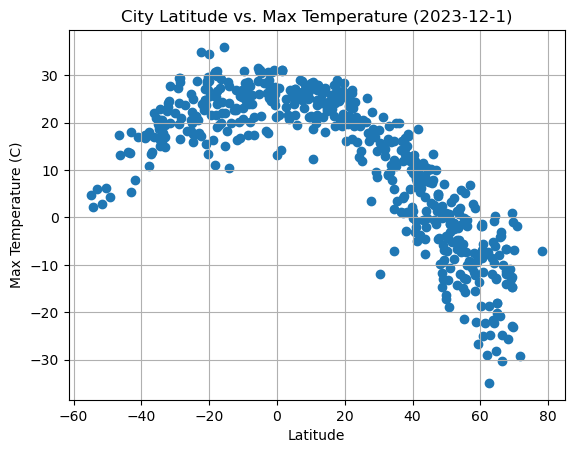

In [74]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-12-1)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

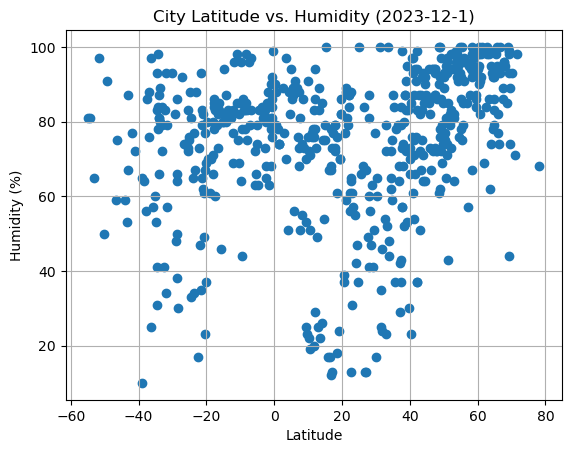

In [75]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-12-1)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

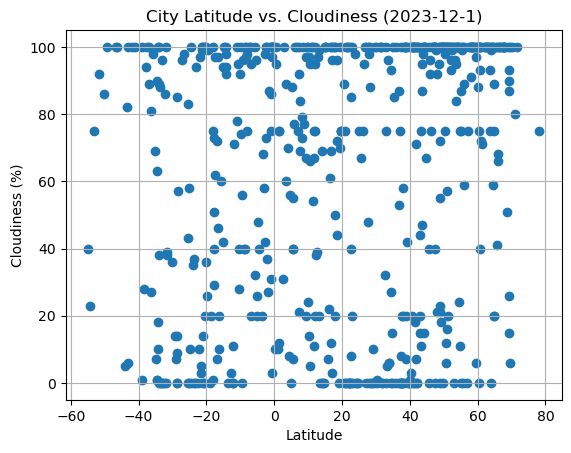

In [76]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-12-1)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

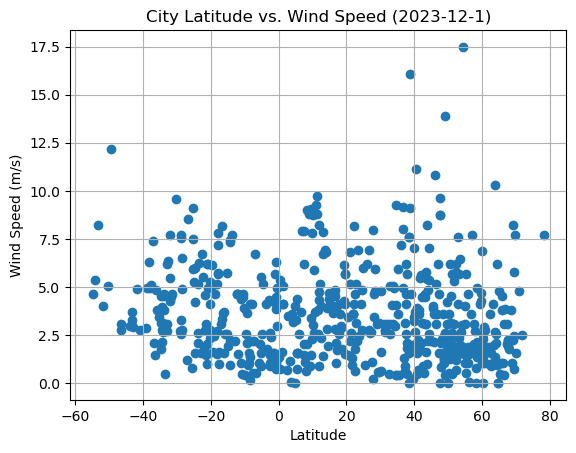

In [77]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-12-1)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [90]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, a, b):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    def linear_model(x):
        return slope * x + intercept
    regress_values = linear_model(np.array(x))
    line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, (0, -5), textcoords='offset points', fontsize=15, color="red")
    plt.xlabel(a)
    plt.ylabel(b)
    print(f"The r-value is: {r_value**2}")
    plt.show()

In [84]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']>=0),:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,longyearbyen,78.2186,15.6401,-7.09,68,75,7.72,SJ,1701480720
6,usogorsk,63.4106,48.6872,-11.85,98,100,1.97,RU,1701480998
8,askoy,60.4092,5.2260,-1.81,100,75,2.57,NO,1701480998
11,bikenibeu village,1.3673,173.1241,30.98,74,75,4.12,KI,1701480403
12,hawaiian paradise park,19.5933,-154.9731,25.73,86,75,4.12,US,1701480999


In [85]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']<0),:])

# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,17.47,59,100,3.08,NZ,1701480997
1,bredasdorp,-34.5322,20.0403,15.07,83,1,2.14,ZA,1701480702
2,port-aux-francais,-49.3500,70.2167,4.36,91,100,12.19,TF,1701480997
3,invercargill,-46.4000,168.3500,13.25,75,100,2.77,NZ,1701480997
5,west island,-12.1568,96.8225,26.99,69,11,4.63,CC,1701480415
...,...,...,...,...,...,...,...,...,...
536,plaza huincul,-38.9260,-69.2086,16.75,10,1,4.92,AR,1701481105
538,taro,-8.3862,115.2800,24.00,85,100,1.35,ID,1701481105
541,chato,-2.6378,31.7669,17.91,83,42,1.43,TZ,1701481106


###  Temperature vs. Latitude Linear Regression Plot

C:\Users\Ryan Denninger\AppData\Local\Temp\ipykernel_20364\1401965493.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(line_eq, (0, -5), textcoords='offset points', fontsize=15, color="red")


The r-value is: 0.7944661071620394


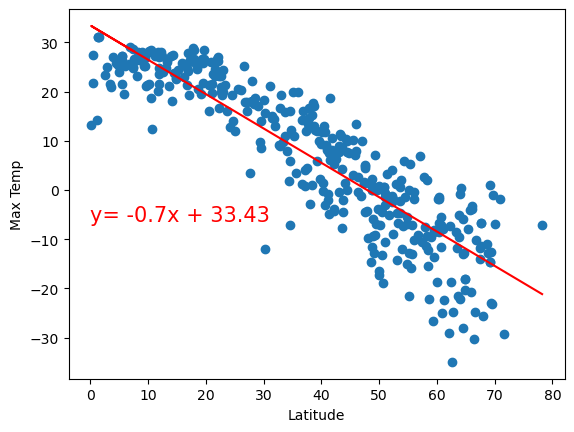

In [91]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')


The r-value is: 0.3997310416302085


C:\Users\Ryan Denninger\AppData\Local\Temp\ipykernel_20364\1401965493.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(line_eq, (0, -5), textcoords='offset points', fontsize=15, color="red")


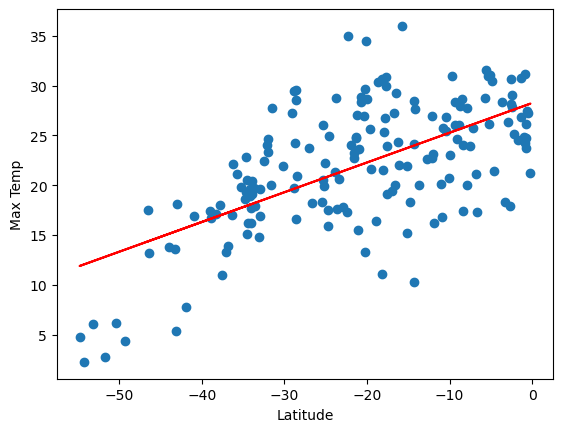

In [92]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


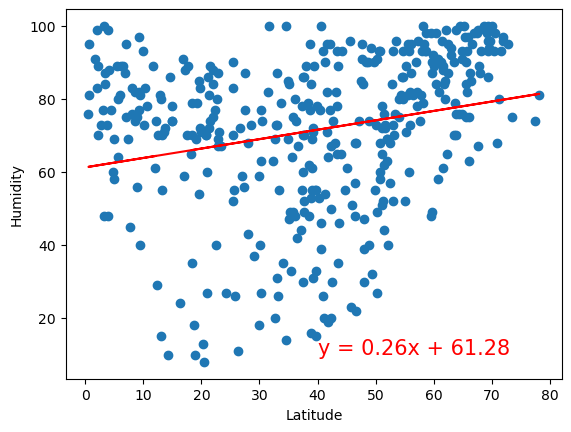

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


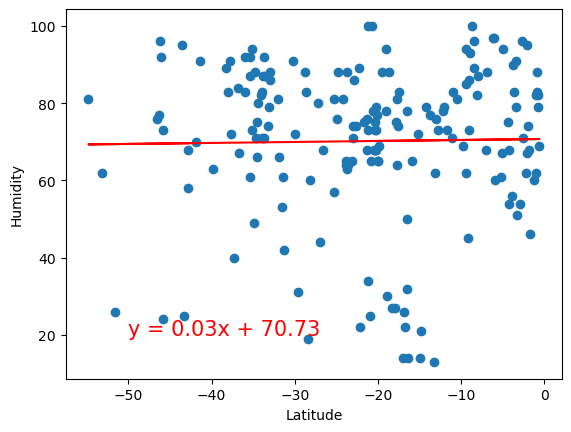

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


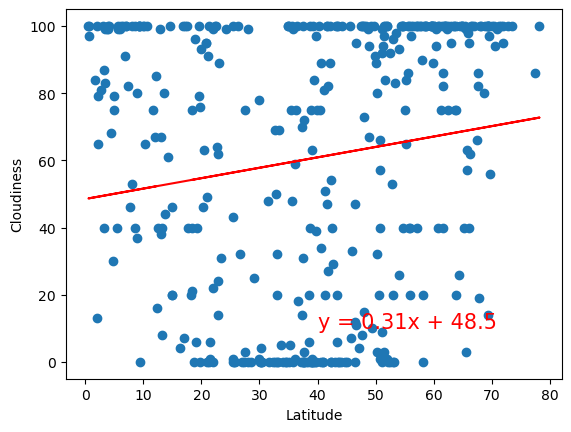

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


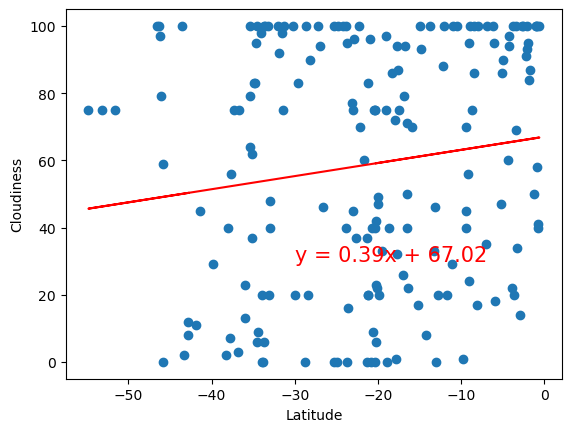

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


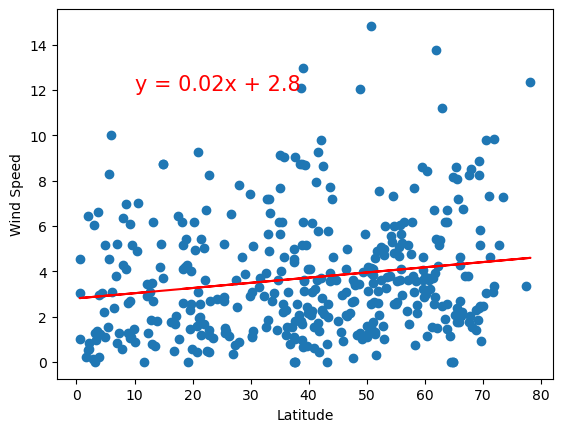

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


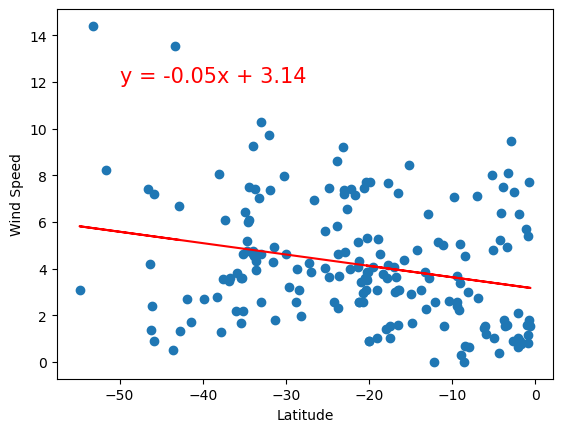

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE